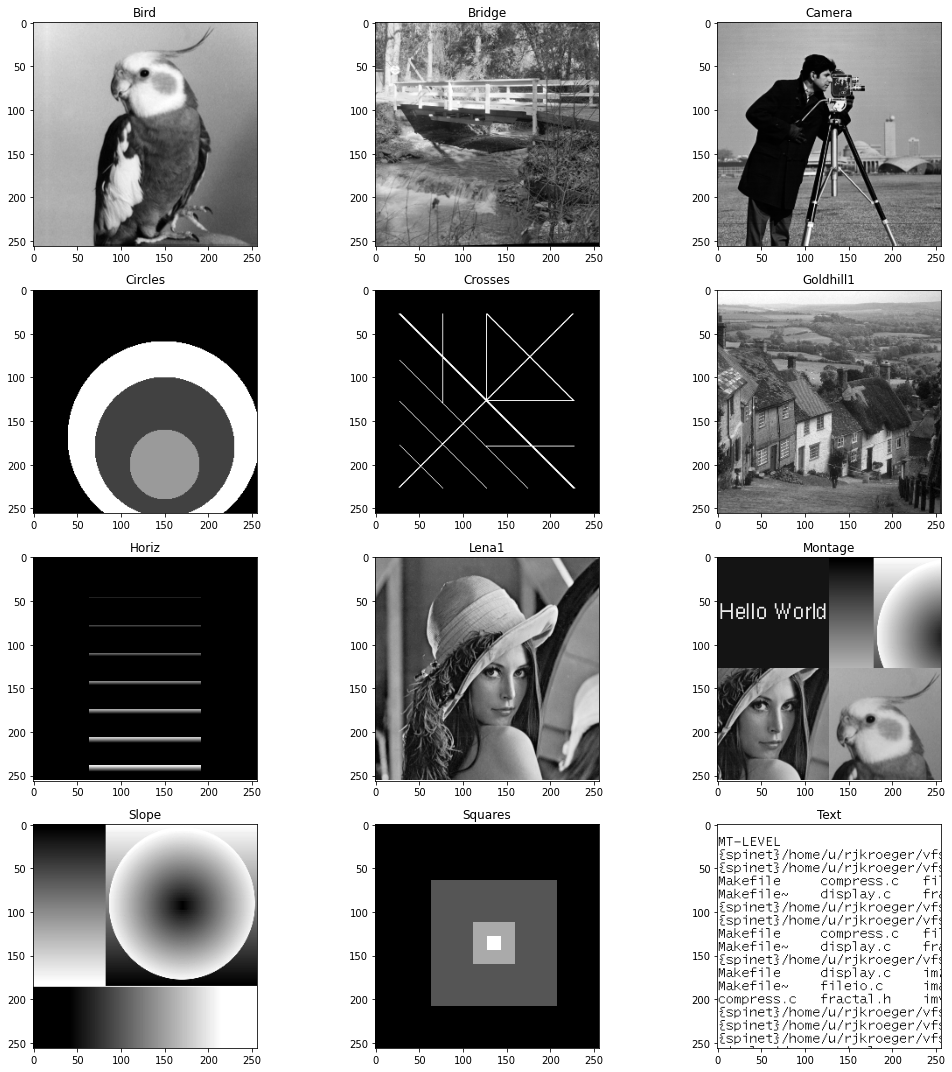

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




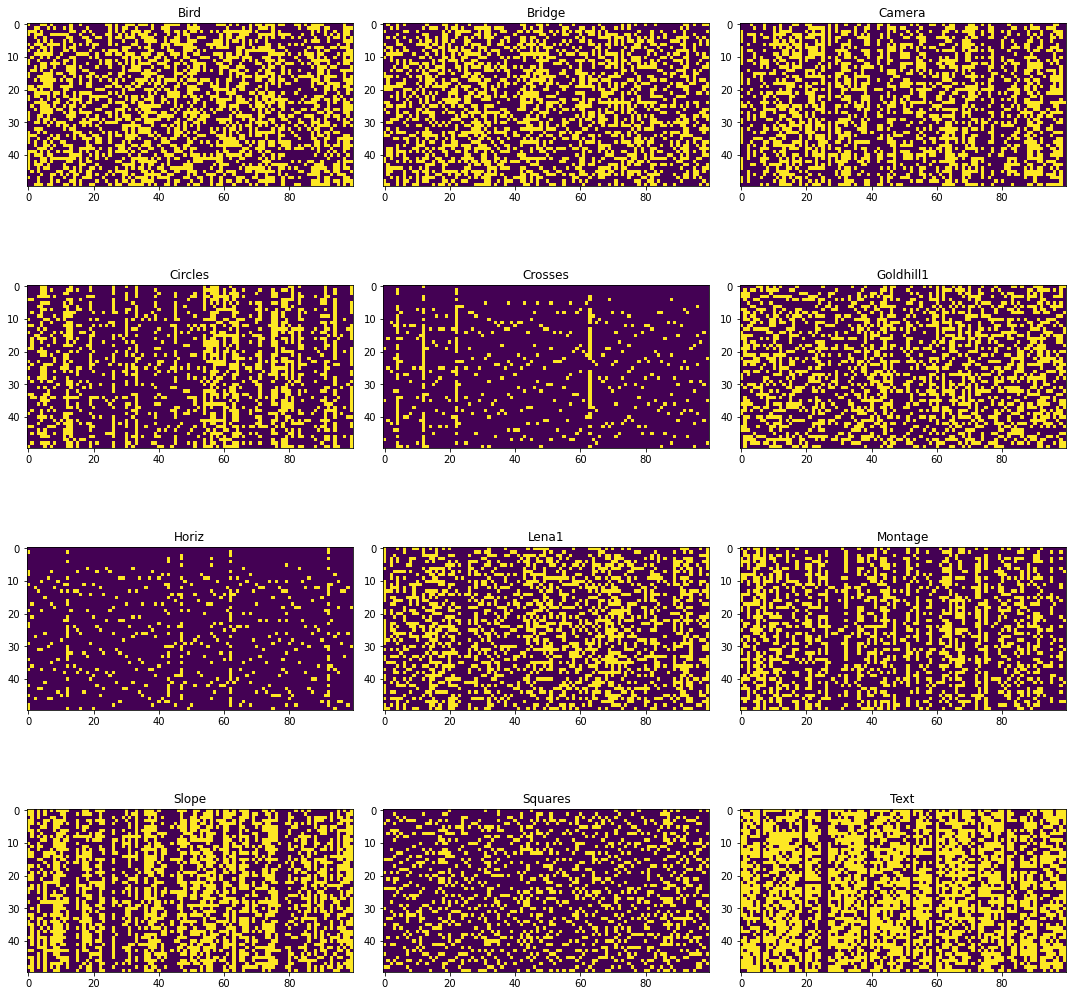

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1320xBatch: 1/1 (100%) 4788.749ms


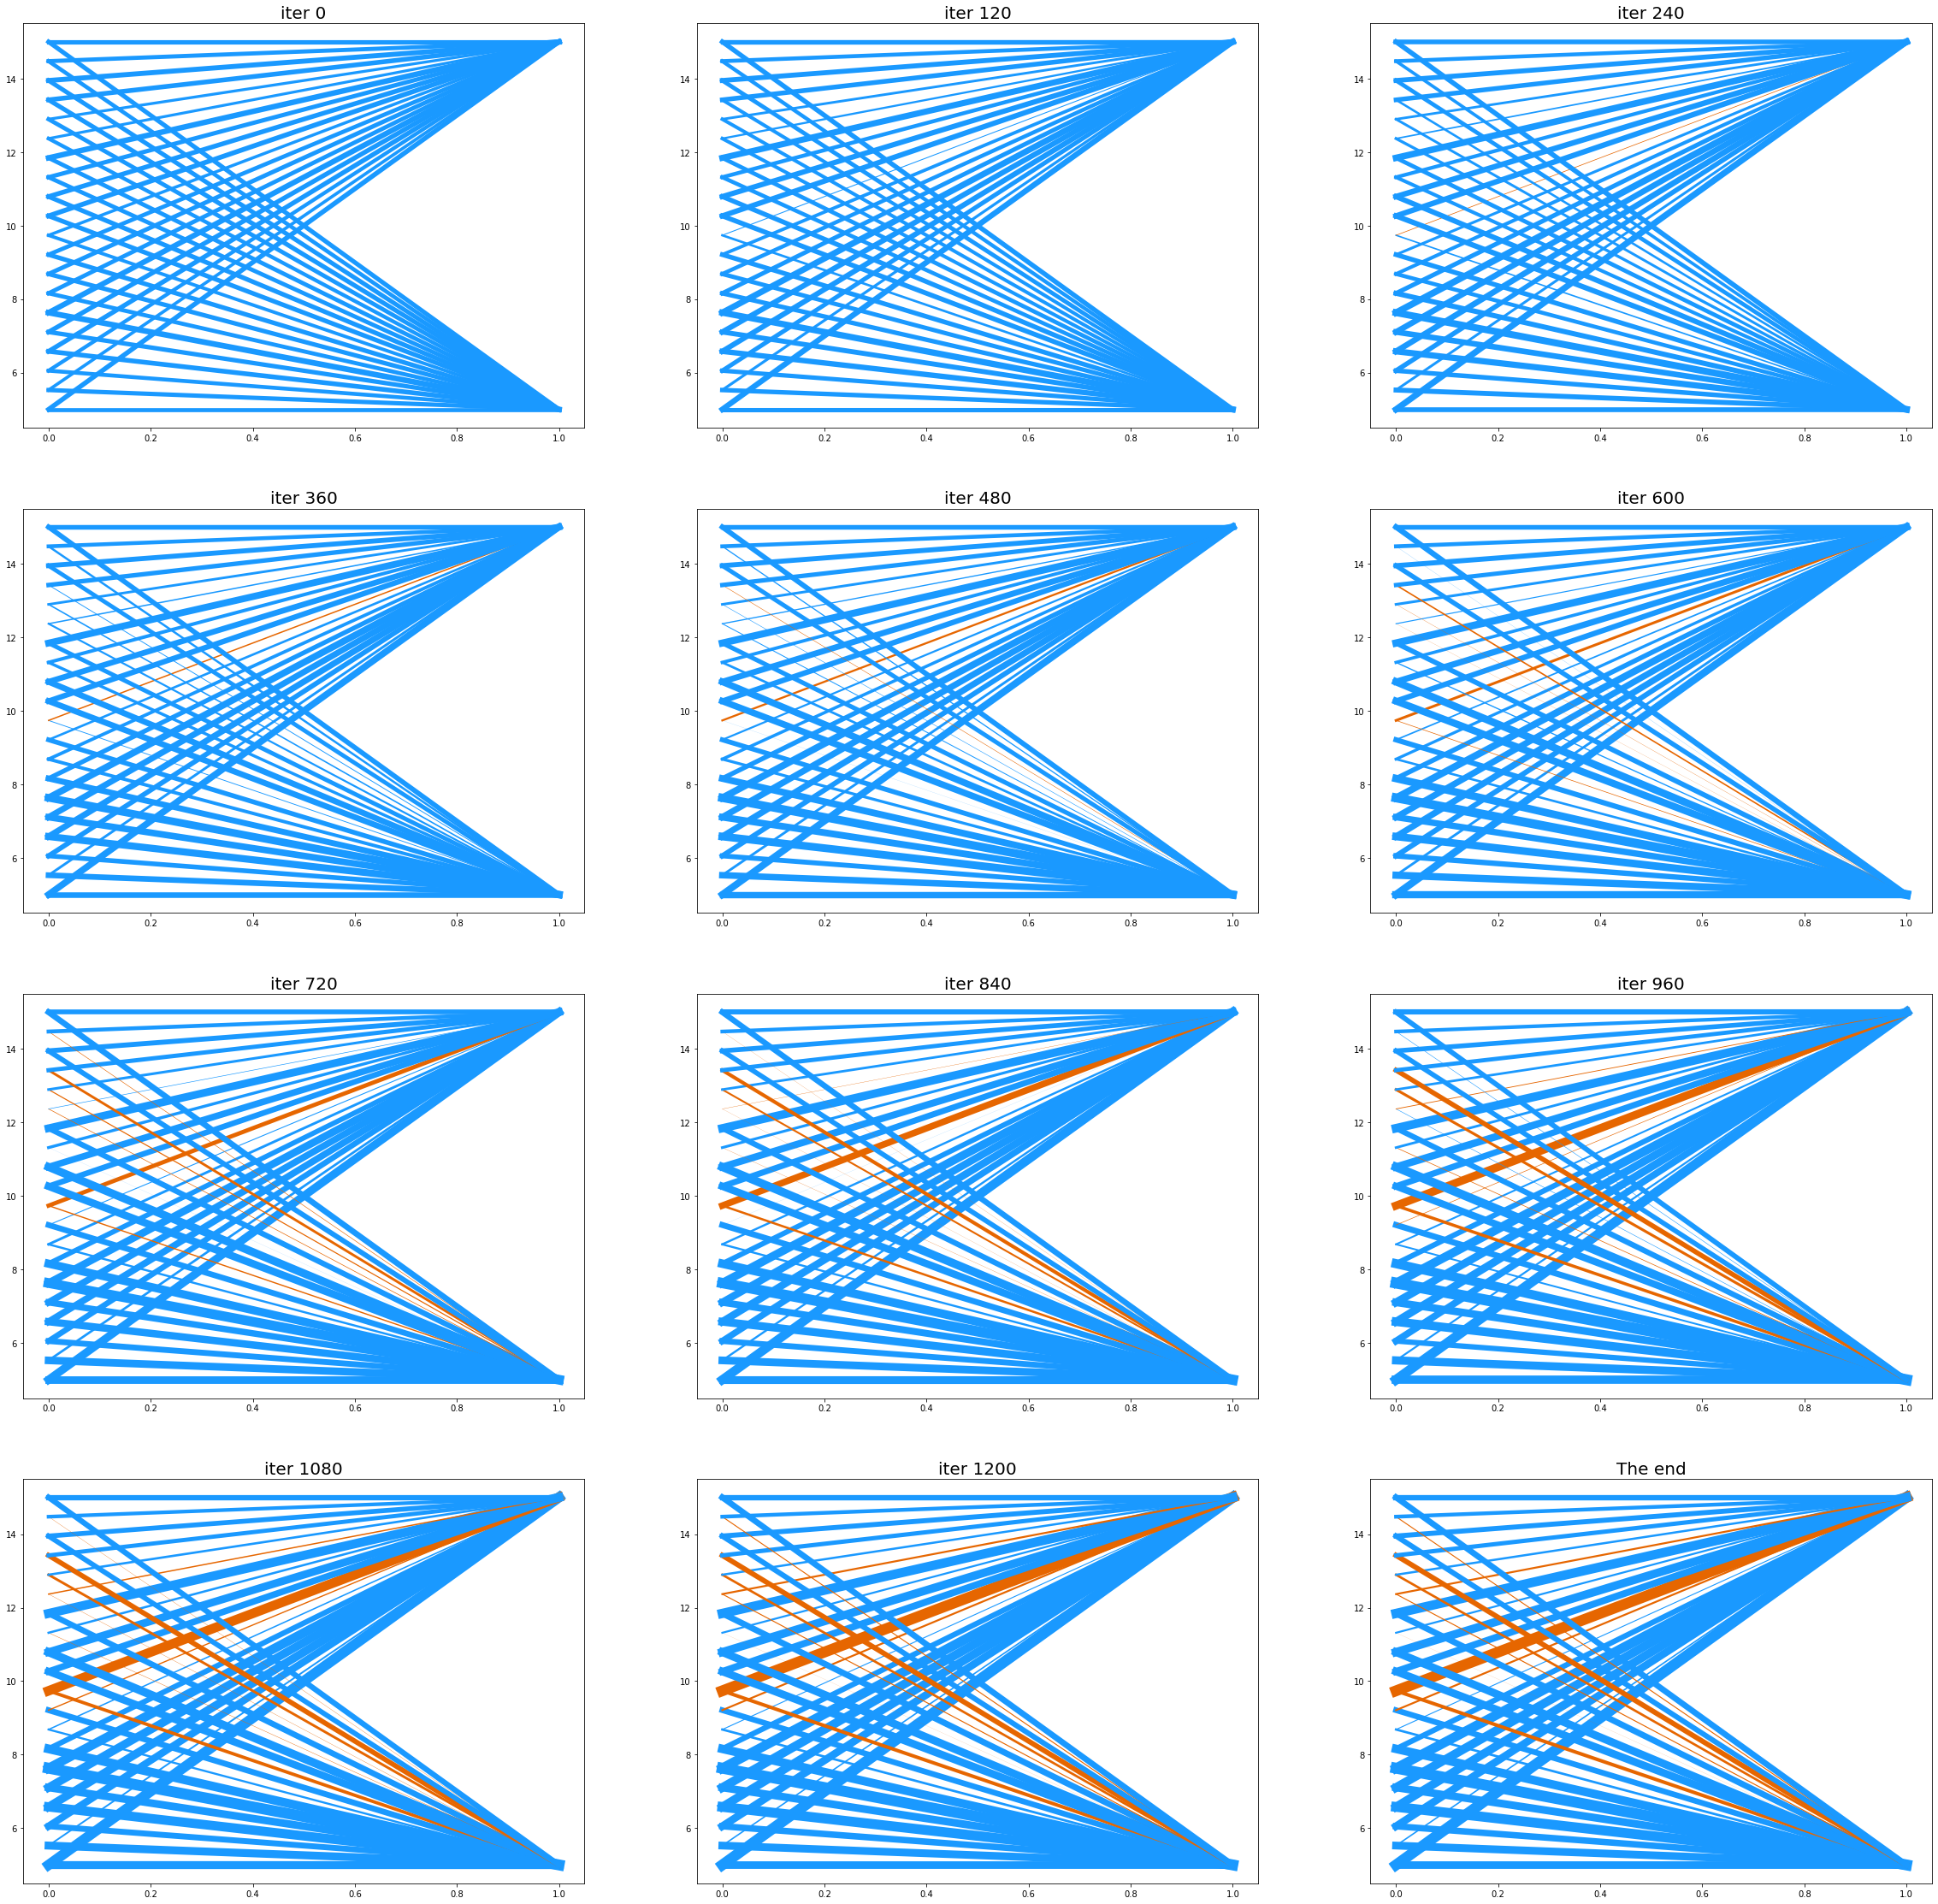

torch.Size([2970, 2])
torch.Size([626, 2])
Weights:
N1 & N2 & diff \\
88.55 & 125.48 & -36.93\\
90.52 & 16.52 & 74.0\\
75.51 & 89.02 & -13.51\\
115.09 & 98.58 & 16.51\\
89.68 & 101.8 & -12.12\\
127.62 & 110.84 & 16.78\\
99.96 & 63.51 & 36.45\\
27.61 & 11.17 & 16.44\\
66.45 & -22.04 & 88.49\\
-41.25 & -126.31 & 85.05\\
89.32 & 80.35 & 8.97\\
91.52 & 96.78 & -5.26\\
-0.96 & 22.37 & -23.32\\
71.79 & 109.06 & -37.27\\
-11.69 & -22.12 & 10.43\\
-27.57 & 25.45 & -53.01\\
-59.87 & 50.57 & -110.44\\
61.76 & 58.59 & 3.17\\
-11.45 & 44.53 & -55.98\\
69.81 & 62.88 & 6.93\\
similarity: 0.8052008152008057


In [3]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from metrics import weights_similarity

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10, 'learn': 'rstdp', 'reward': 5}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=1, image_dur=15, image_sleep=15, iters=1320, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=120)
plt.show()
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

# Similarity
print("\33[1mWeights:")
print("N1 & N2 & diff \\\\")
for i in range(model.syn.W.shape[0]):
    print(f"{round(model.syn.W[i, 0].item(), 2)} & {round(model.syn.W[i, 1].item(), 2)} & {round((model.syn.W[i, 0] - model.syn.W[i, 1]).item(), 2)}\\\\")
print(f"similarity: {weights_similarity(model.syn.W)}")


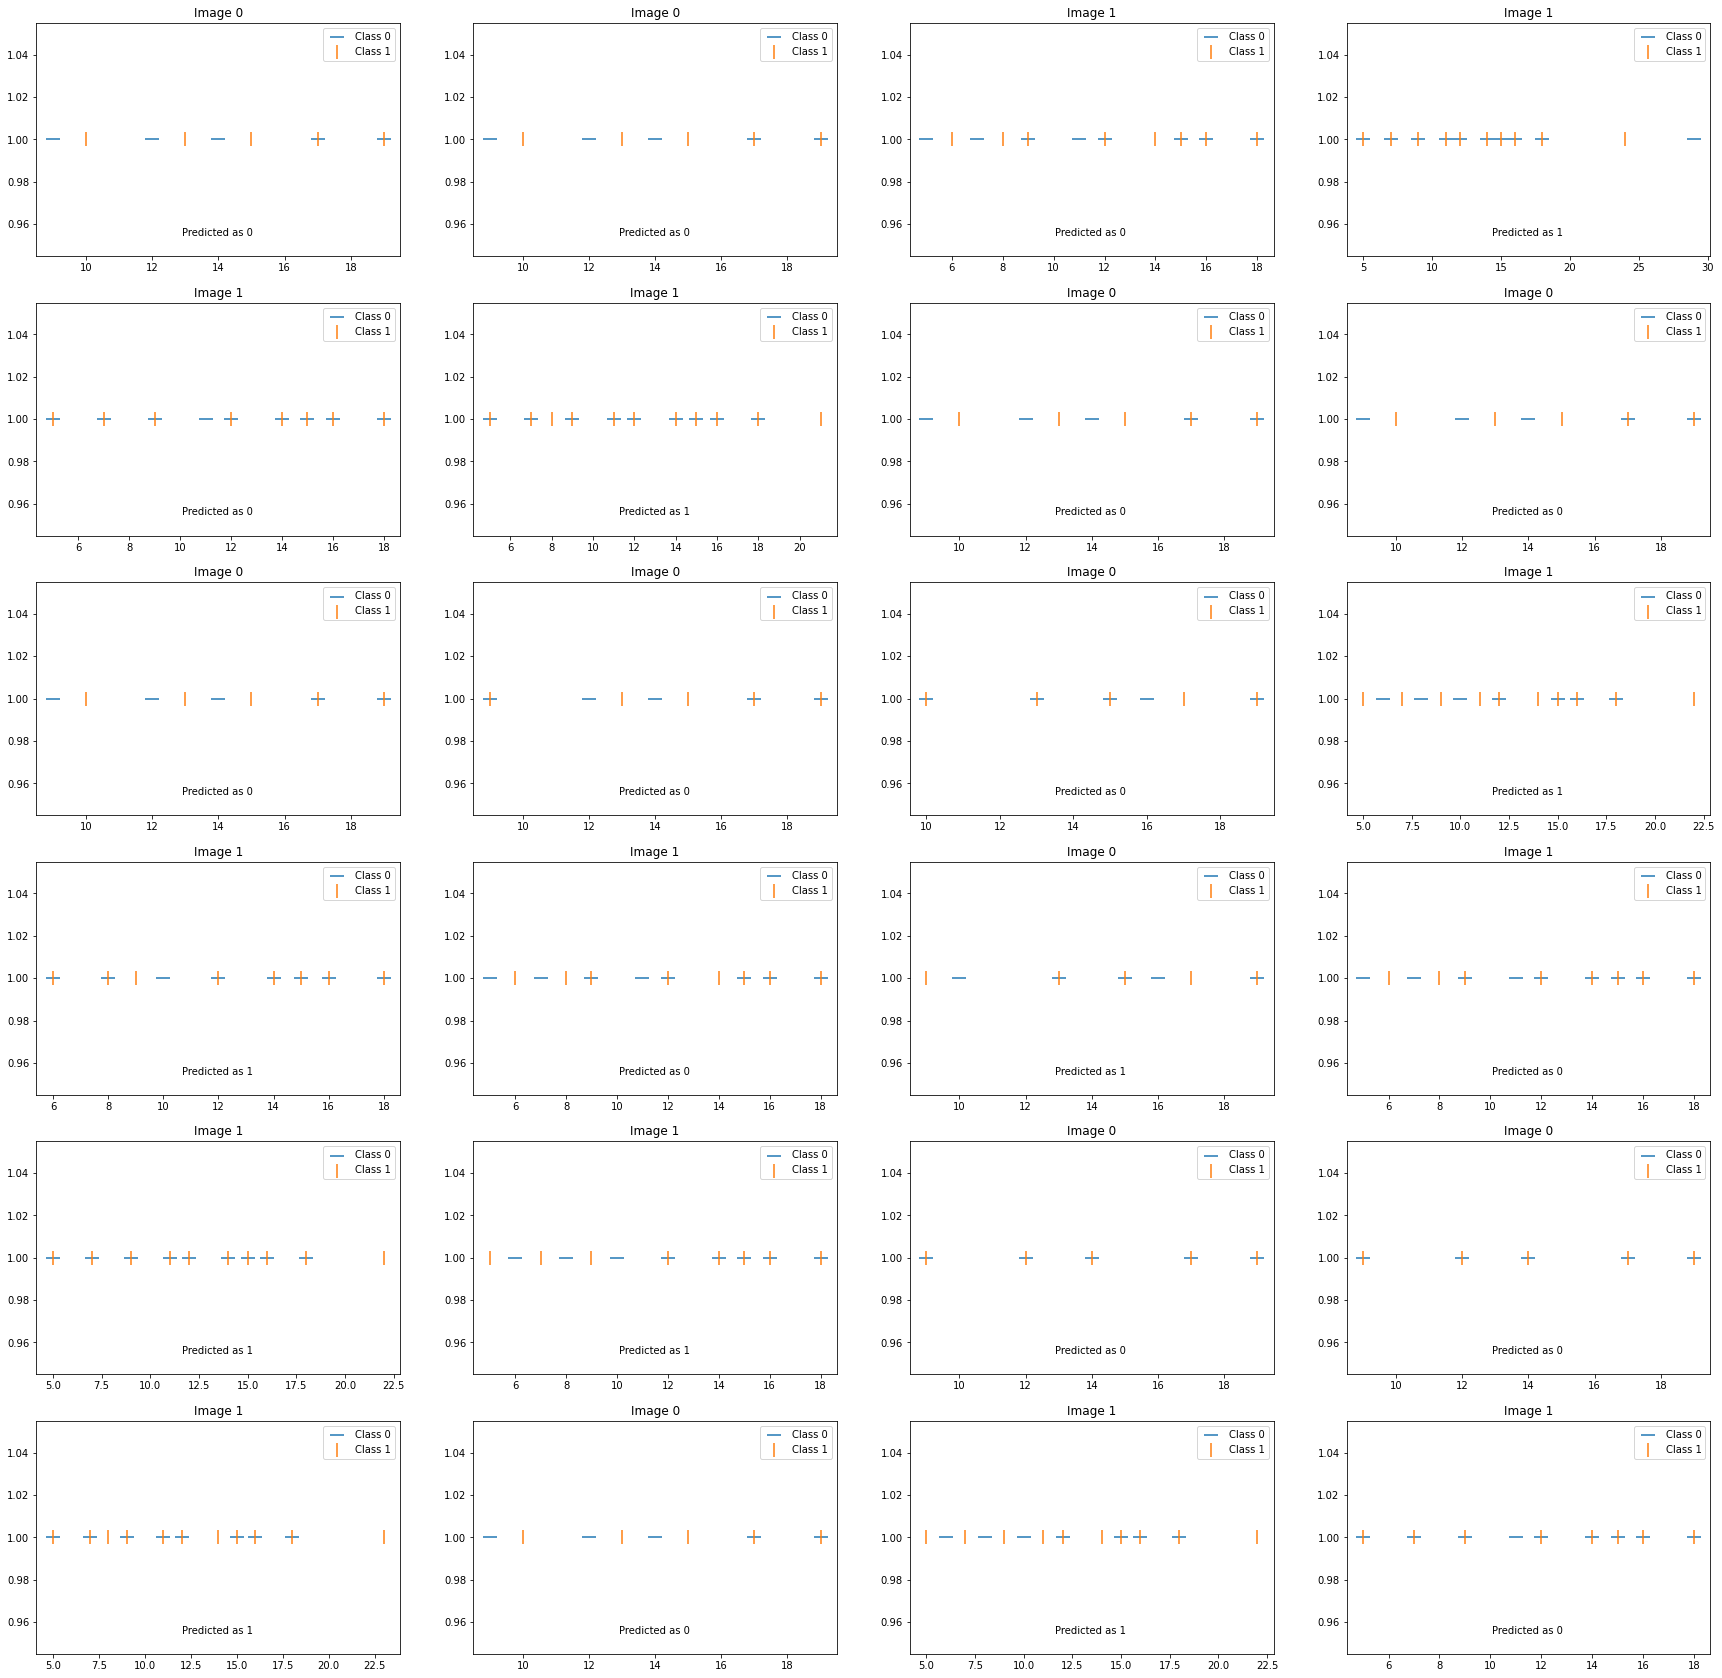

Accuracy: 18/24 = 0.75


In [4]:
import torch
import matplotlib.pyplot as plt
testNum = 24
corrects = 0
fig, ax = plt.subplots(testNum // 4, 4, figsize=(30, 5 * testNum // 4))
for i in range(testNum):
    result = model.test()
    ng_out = result['ng_out']
    actual = result['actual']
    predict = result['predict']
    zeros = ng_out['spike', 0][:, 1] == 0
    ax[i // 4, i % 4].scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_', s=200)
    ax[i // 4, i % 4].scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|', s=200)
    ax[i // 4, i % 4].legend(['Class 0', 'Class 1'])
    ax[i // 4, i % 4].set_title(f"Image {actual}")
    ax[i // 4, i % 4].annotate(f"Predicted as {predict}", (0.4, 0.1), xycoords='axes fraction', va='center')
    corrects += actual == predict
plt.show()
print(f"Accuracy: {corrects}/{testNum} = {corrects / testNum}")

